In [25]:
MERCHAINDISE = 'LTCUSDT'
DAYS = 100


# format = YYYY-MM-DD
START_DATE = '2021-10-1'
END_DATE = '2021-11-1'

In [26]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug(MERCHAINDISE)
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*DAYS, "DESC")
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*DAYS, "DESC", start_date=START_DATE, end_date=END_DATE)

data_prices = candlestick.to_df()


# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
data_prices['type_continuous'] = type_continuous(data_prices)

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)



In [27]:
data_price_1 = data_prices[(data_prices['hour'] == 1)]['type'].to_list()
data_price_2 = data_prices[(data_prices['hour'] == 2)]['type'].to_list()
data_price_3 = data_prices[(data_prices['hour'] == 3)]['type'].to_list()
data_price_4 = data_prices[(data_prices['hour'] == 4)]['type'].to_list()
data_price_5 = data_prices[(data_prices['hour'] == 5)]['type'].to_list()
data_price_6 = data_prices[(data_prices['hour'] == 6)]['type'].to_list()
data_price_7 = data_prices[(data_prices['hour'] == 7)]['type'].to_list()
data_price_8 = data_prices[(data_prices['hour'] == 8)]['type'].to_list()
data_price_9 = data_prices[(data_prices['hour'] == 9)]['type'].to_list()
data_price_10 = data_prices[(data_prices['hour'] == 10)]['type'].to_list()
data_price_11 = data_prices[(data_prices['hour'] == 11)]['type'].to_list()
data_price_12 = data_prices[(data_prices['hour'] == 12)]['type'].to_list()
data_price_13 = data_prices[(data_prices['hour'] == 13)]['type'].to_list()
data_price_14 = data_prices[(data_prices['hour'] == 14)]['type'].to_list()
data_price_15 = data_prices[(data_prices['hour'] == 15)]['type'].to_list()
data_price_16 = data_prices[(data_prices['hour'] == 16)]['type'].to_list()
data_price_17 = data_prices[(data_prices['hour'] == 17)]['type'].to_list()
data_price_18 = data_prices[(data_prices['hour'] == 18)]['type'].to_list()
data_price_19 = data_prices[(data_prices['hour'] == 19)]['type'].to_list()
data_price_20 = data_prices[(data_prices['hour'] == 20)]['type'].to_list()
data_price_21 = data_prices[(data_prices['hour'] == 21)]['type'].to_list()
data_price_22 = data_prices[(data_prices['hour'] == 22)]['type'].to_list()
data_price_23 = data_prices[(data_prices['hour'] == 23)]['type'].to_list()
data_price_0 = data_prices[(data_prices['hour'] == 0)]['type'].to_list()

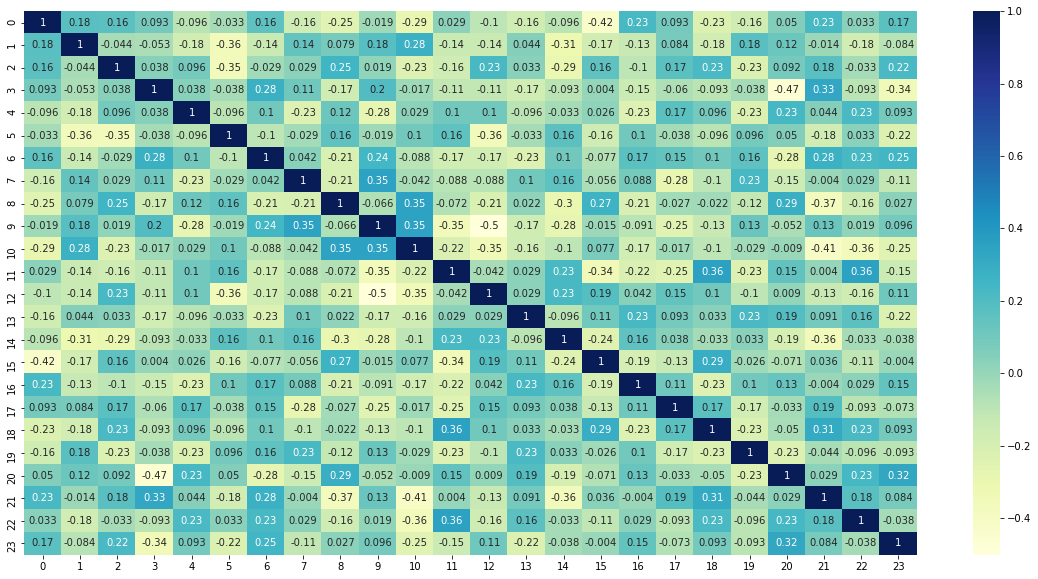

In [28]:
from sklearn.metrics import matthews_corrcoef
import seaborn as sns
import pandas as pd


data_dict = {}

for i in range(0,24):
    x = f"data_price_{i}"
    x_values = []
    for j in range(0,24):
        y = f"data_price_{j}"
        phi_coefficient = round(matthews_corrcoef(globals()[x], globals()[y]), 3)
        x_values.append(phi_coefficient)
    data_dict[i] = x_values 

df = pd.DataFrame(data_dict, index=range(0,24))
fig, ax = plt.subplots(figsize=[20,10])  
ax = sns.heatmap(df, annot=True, cmap="YlGnBu", ax=ax)
